# Chapter 3, Classification
We will work with MNIST dataset for classifying handwritten digits with the corresponding actual value. Scikit provides handy functions to get this dataset.

#### Warning!
The book uses a different method to download MNIST dataset but it seems it is not working, hence I'm using the official sickit's method to download mnist.

In [3]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [60]:
import matplotlib.pyplot as plt
import numpy as np

def print_samples(X, y, shape = (2, 2), raw=False):
    """Print n random samples"""
    if raw:
        rand_indx = np.random.randint(0, len(X), shape[0])
        samples = zip(X[rand_indx], y[rand_indx])
        print(list(samples))
    else:
        n_samples = int(shape[0]) * int(shape[1])
        rand_indx = np.random.randint(0, len(X), n_samples)
        samples = zip(X[rand_indx], y[rand_indx])
        idx = 1
        for features, label in samples:
            # X is a flattened array, to print the image we need
            # to reshape it into a 28 x 28 figure
            plt.subplot(*shape, idx)
            plt.tight_layout()
            plt.imshow(features.reshape(28,28), cmap=plt.cm.gray_r)
            plt.title("Label: {}".format(label))
            idx+=1
        plt.show()

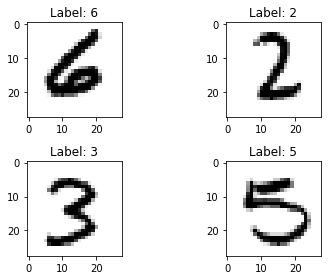

In [61]:
print_samples(X, y, (2, 2))

#### Remember!
Always create the training, validation and test set.

In [62]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Warning
You have to keep in mind the data you are dealing with and the possible algorithms and validation methods you are going to use. Some algorithms are sensitive to the order of the training set hence we don't want to feed them in the same order every time.

Also, if we are going to use k-fold cross-validation, we want to ensure that every fold get's samples of every number.

In [70]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a binary classifier
Say we want to just be able to detect if a particular sample is a 5 or not, this is an example of a binary classifier i.e., true or false.

### Warning
The way we loaded MNIST, the labels are strings not ints, hence we test with the string '5' as opposed to the int 5

In [87]:
# This simply will change the labels to True, the number is a 5, and False, is not
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

### Stochastic Gradient Descent
This algorithm handles large datasets efficiently and works on training instances independently, i.e., one at a time.

We'll use sickit's ```SGDClassifier```

In [88]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Users/ferro/anaconda3/envs/Deeplearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [91]:
# This means the first digit was predicted to be a five
sgd_clf.predict(X_train[10:20])

array([ True, False, False, False, False, False, False, False, False,
       False])

Now let's measure the model's performance with K-fold cross validation

In [94]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/Users/ferro/anaconda3/envs/Deeplearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/ferro/anaconda3/envs/Deeplearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/ferro/anaconda3/envs/Deeplearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been add

array([0.90495, 0.96445, 0.9583 ])

90-95% of accuracy!, very impressive, before continuing, let's see what happens when we create a model exclusively for not-5 class.

In [95]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9083 , 0.90905, 0.9116 ])

Wow!, almost the same score, it seems our model is not that good after all. This is because of all the samples, only 10% of them are actually 5. So a model that predicts 90% of the time the image is not a 5 given this circumstances, it is not that useful.

This is a hint to say that 'accuracy' is not always the best metric for classifiers, especialluy when dealing with skewed datasets.

## Confusion Matrix

In [ ]:
from sklearn